In [165]:
import pandas as pd
import numpy as np

In [166]:
df = pd.read_csv('all_data.csv')

In [167]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
185682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
185683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
185684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [168]:
df['Order ID'].duplicated().sum()

7249

In [169]:
small_letters = map(chr, range(ord('a'), ord('z')+1))

In [170]:
df['Order Date'].str.contains('[small_letters]', regex=True).any()

False

In [171]:
df['Month'] = df['Order Date'].str[0:2]

In [172]:
df['Month'] = df['Month'].astype('int32')

In [173]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
185682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
185683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
185684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [174]:
result = df.groupby('Month')['Sales'].sum()

In [175]:
result

Month
1     1.821413e+06
2     2.200078e+06
3     2.804973e+06
4     3.389218e+06
5     3.150616e+06
6     2.576280e+06
7     2.646461e+06
8     2.241083e+06
9     2.094466e+06
10    3.734778e+06
11    3.197875e+06
12    4.608296e+06
Name: Sales, dtype: float64

In [176]:
result = df.groupby('Month')['Sales'].sum()

In [177]:
import matplotlib.pyplot as plt

In [178]:
months = range(1,13)

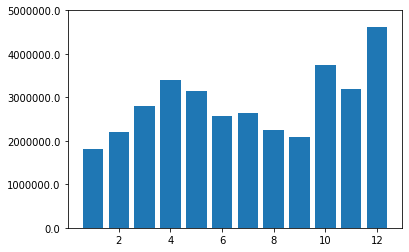

In [179]:
plt.bar(months,result)
labels, locations = plt.yticks()
plt.yticks(labels, (labels))
plt.show()

In [ ]:
result.max()

# add city columns

In [ ]:
df['Column'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [ ]:
df

In [ ]:
df = df.rename(columns={'Column':'City'})

In [ ]:
df

In [ ]:
df.boxplot(column=['Quantity Ordered'])
plt.show()

In [ ]:
df[df['Quantity Ordered'] > 8]

In [ ]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + '(' + x.split(',')[2].split(' ')[1] + ')')

In [ ]:
df

In [ ]:
result = df.groupby('City')['Sales'].sum()

In [ ]:
result

In [ ]:
cities1 = [city for city, df in df.groupby('City')]

In [ ]:
cities

In [ ]:
cities1

In [ ]:
df['Order ID'] = df['Order ID'].astype('str')

In [ ]:
plt.bar(cities1,result)
labels, locations = plt.yticks()
plt.yticks(labels, (labels))
plt.xticks(cities, rotation='vertical')
plt.show()

In [ ]:
cities

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [ ]:
df.head()

In [ ]:
hours = [hour for hour, df in df.groupby('Hour')]
result2 = df.groupby('Hour')['Sales'].sum()
result2

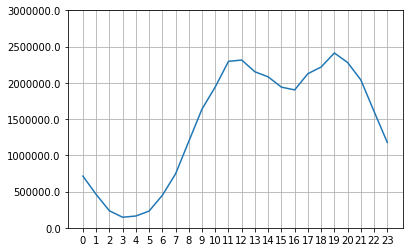

In [181]:
plt.plot(hours,result2)
labels, locations = plt.yticks()
plt.yticks(labels, (labels))
plt.xticks(hours)
plt.grid()
plt.show()

In [ ]:
df.to_csv('all_data_baru.csv')

In [182]:
abc = pd.read_csv('all_data.csv')

In [189]:
abc['Sales'].max()

3400.0